# CaixaBank Tech Hackathon

## 1. Importación librerías principales librerías

A lo largo del código se importarán el resto de librerías o módulos necesarios en cada momento

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 2. Carga de datos

In [2]:
train = pd.read_csv("dataset/train.csv", index_col=0)
tweets = pd.read_csv("dataset/tweets_from2015_#Ibex35.csv", index_col=0)

In [3]:
train.head()

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [4]:
tweets.head()

,handle,text
tweetDate,,
Sat Apr 09 14:47:45 +0000 2022,abelac62,He hecho el repaso de todos los componentes de...
Thu Apr 07 19:14:36 +0000 2022,LluisPerarnau,Els projectes que han presentat les empreses d...
Mon Apr 04 16:48:45 +0000 2022,Pegaso121080,"Por si no lo has visto, o no lo encuentras en ..."
Tue Apr 05 07:23:16 +0000 2022,zonavalue,📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 ...
Thu Mar 31 16:07:43 +0000 2022,EPeconomia,"El #Ibex35 retrocede un 0,4% en marzo y un 3,0..."


Comprobamos si existen valores perdidos (NaN), y en caso afirmativo, los tratamos. 

In [5]:
train.isnull().sum()

Open         133
High         133
Low          133
Close        133
Adj Close    133
Volume       133
Target         0
dtype: int64

Tenemos ciertos datos con valores nulos. Es llamativo que en todas las características tenemos el mismo número de datos faltantes. Vamos a dar un vistazo a estos valores.

In [6]:
train.isnull()

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1994-01-03,False,False,False,False,False,False,False
1994-01-04,False,False,False,False,False,False,False
1994-01-05,False,False,False,False,False,False,False
1994-01-06,True,True,True,True,True,True,False
1994-01-07,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2019-05-24,False,False,False,False,False,False,False
2019-05-27,False,False,False,False,False,False,False
2019-05-28,False,False,False,False,False,False,False


In [7]:
train[train.Open.isnull()]

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
1994-04-01,NaN,NaN,NaN,NaN,NaN,NaN,0
1994-04-04,NaN,NaN,NaN,NaN,NaN,NaN,0
1994-05-02,NaN,NaN,NaN,NaN,NaN,NaN,0
1994-10-12,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
2005-12-26,NaN,NaN,NaN,NaN,NaN,NaN,0
2007-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0
2007-12-24,NaN,NaN,NaN,NaN,NaN,NaN,0


Parece que tenemos 133 filas donde no se tiene información sobre ninguna de las columnas. De ser así, estos datos son totalmente inútiles. Vamos a eliminar aquellos registros donde nos encontramos con esta situación. El problema es que vamos a tener días en el dataset sin ninguna información. Quizás eso nos da algún problema.

In [8]:
train_nonull = train.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], how='all')
train_nonull

,Open,High,Low,Close,Adj Close,Volume,Target
Date,,,,,,,
1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1
1994-01-10,3655.199951,3678.199951,3655.199951,3660.600098,3660.596436,0.0,1
...,...,...,...,...,...,...,...
2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0
2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0
2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0


In [9]:
train_nonull.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

Efectivamente, tal y como supusimos, el dataset presentaba 133 días sin ninguna información en ninguna de las columnas. Eran totalmente inútiles.

## 3. Primeros análisis de los datos

In [10]:
target = "Target"
features = list(train_nonull.columns)
features.remove(target)

In [11]:
print("Nuestras variables explicativas son:", features)
print("Nuestra variable objetivo es:", target)

Nuestras variables explicativas son: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Nuestra variable objetivo es: Target


In [12]:
train_nonull.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6421.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.527644
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499274
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


In [13]:
train_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6421 entries, 1994-01-03 to 2019-05-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6421 non-null   float64
 1   High       6421 non-null   float64
 2   Low        6421 non-null   float64
 3   Close      6421 non-null   float64
 4   Adj Close  6421 non-null   float64
 5   Volume     6421 non-null   float64
 6   Target     6421 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 401.3+ KB


Por lo que podemos observar, todas las variables explicativas son de tipo numéricas (no hay ninguna categórica), mientras que la variable objetivo es una variable binaria, la cual vale 0 o 1. Por tanto, estamos ante un problema de clasificación. Debemos predecir si nuestra variable objetivo será 0 o 1.

## 4. Representaciones de los datos

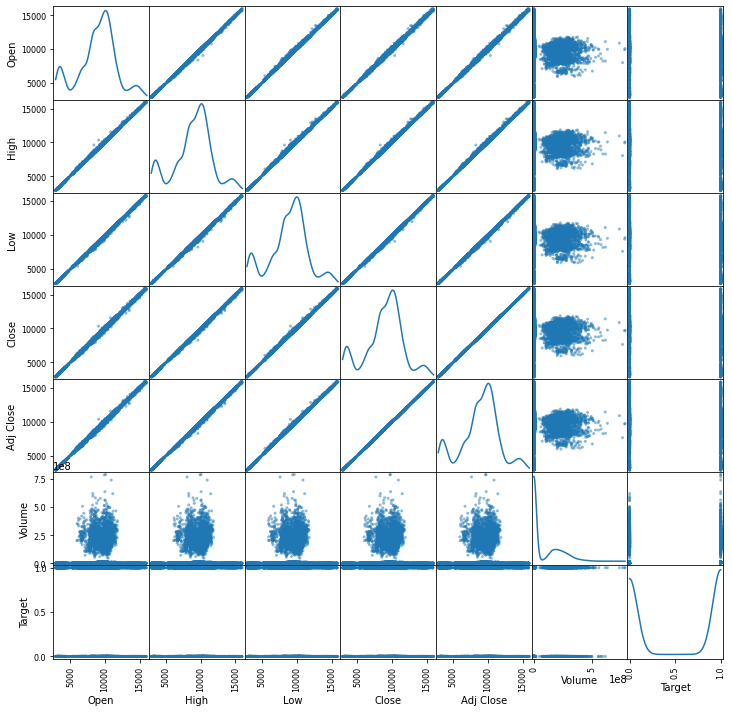

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_nonull, figsize = (12, 12), diagonal = 'kde');

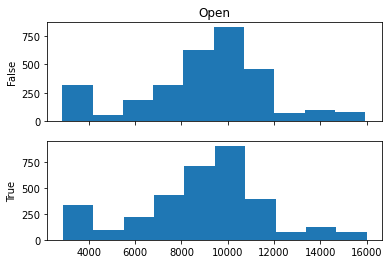

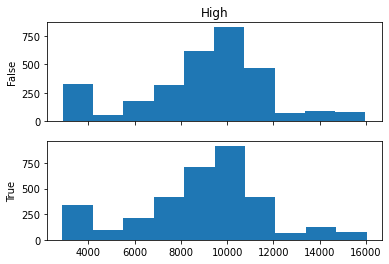

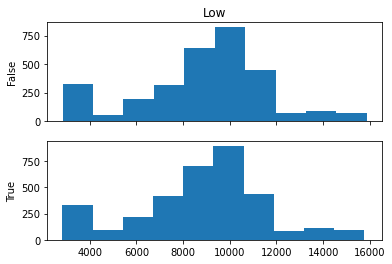

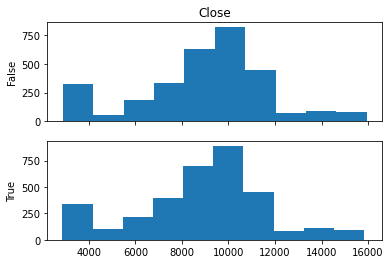

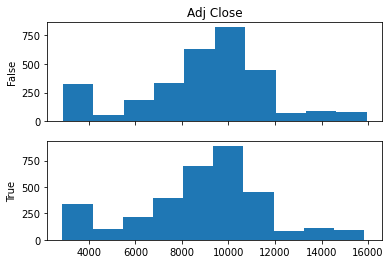

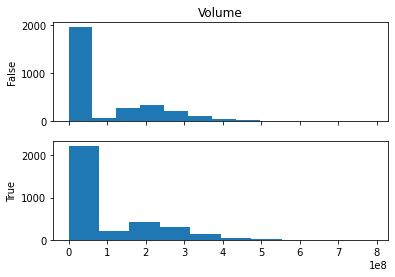

In [15]:
for var in features:
    f, axarr = plt.subplots(2, sharex = True)
    
    axarr[0].hist(train_nonull[var][train_nonull[target]==0])
    axarr[1].hist(train_nonull[var][train_nonull[target]==1])
    
    axarr[0].set_ylabel('False')
    axarr[1].set_ylabel('True')
    axarr[0].set_title(var)

Todas las características que contiene el dataset nos pueden ser de gran ayuda, por lo que no es necesario eliinar ninguna de ellas.

<AxesSubplot:>

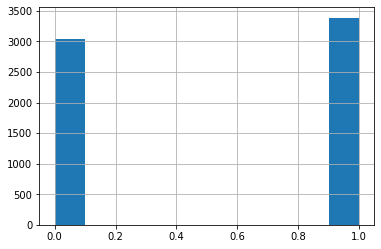

In [16]:
train_nonull.Target.hist()

Tenemos una distribución equitativa entre los 0 y 1, esto es bueno.

## 5. Ingeniería de características

He decidido no hacer uso del dato del día, sin embargo, sería interesante poder controlar la tendencia. Podemos crear variables que sean, por ejemplo, el precio de cierre entre distintos días, así podemos observar si en un día concreto, el precio está subiendo o bajando. Creo una función para ello.

In [17]:
def create_diff_column (df, column, window):
    
    new_column = column + "_diff_" + str(window)
    
    #df[new_column] = df[column].rolling(window=window).apply(lambda x: x.iloc[1] - x.iloc[0])
    df[new_column] = df[column].diff(periods=window)
    
    return df

def create_diff_columns (df, column, n_days):
    for day in range(1, n_days):
        df = create_diff_column (df, column, day)
    
    return df

In [18]:
train_ing = create_diff_columns(train_nonull.copy(deep=True), "Adj Close", 5)

Tenemos dos variables prácticamente iguales, _Close_ y _Adj Close_. Eliminaremos la primera de ellas.

In [19]:
train_ing.drop(columns=["Close"], inplace=True)

Llegamos, por tanto, al siguiente dataset:

In [20]:
train_ing

,Open,High,Low,Adj Close,Volume,Target,Adj Close_diff_1,Adj Close_diff_2,Adj Close_diff_3,Adj Close_diff_4
Date,,,,,,,,,,
1994-01-03,3615.199951,3654.699951,3581.000000,3654.496338,0.0,0,NaN,NaN,NaN,NaN
1994-01-04,3654.500000,3675.500000,3625.100098,3630.296387,0.0,1,-24.199951,NaN,NaN,NaN
1994-01-05,3625.199951,3625.199951,3583.399902,3621.196289,0.0,1,-9.100098,-33.300049,NaN,NaN
1994-01-07,3621.199951,3644.399902,3598.699951,3636.396240,0.0,1,15.199951,6.099853,-18.100098,NaN
1994-01-10,3655.199951,3678.199951,3655.199951,3660.596436,0.0,1,24.200196,39.400147,30.300049,6.100098
...,...,...,...,...,...,...,...,...,...,...
2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,121673100.0,0,60.599609,-57.600586,-64.500000,-25.100586
2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,60178000.0,0,41.800782,102.400391,-15.799804,-22.699218
2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,218900800.0,0,-24.600586,17.200196,77.799805,-40.400390


## 6. Selección de características

Una vez tenemos estas nuevas características que hemos creado, podríamos eliminar _Open_ o _Adj Close_. Eliminamos _Open_ por ejemplo.

In [21]:
train_ing.drop(columns=["Open"], inplace=True)

## 7. Preparación modelo

Creamos una función que realize toda la preparación necesaria.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
target = "Target"
features = list(train_ing.columns)
features.remove(target)

In [24]:
train_ing.fillna(0, inplace=True)
    
data_features = train_ing[features]
data_target = train_ing[target]
    
scaler = MinMaxScaler().fit(data_features)
features_MinMax = scaler.transform(data_features)
    
X_train, X_valid, y_train, y_valid = train_test_split(features_MinMax, data_target, train_size=0.8,
                                                      random_state=0)

In [25]:
print('Tamaño X_train:', X_train.shape)
print('Tamaño X_train:', X_valid.shape)
print('Tamaño X_train:', y_train.shape)
print('Tamaño X_train:', y_valid.shape)

Tamaño X_train: (5136, 8)
Tamaño X_train: (1285, 8)
Tamaño X_train: (5136,)
Tamaño X_train: (1285,)


## 8. Modelos

Se crea una función que nos ayude a determinar las métricas de los modelos planteados.

In [26]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

In [27]:
def metricas_modelos(model, y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
    
    print("Modelo:", model)
    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print("\tLa matriz de confusión es ")
    print(confusion_matrix)

    print('\tPrecisión:', accuracy_score(y_true, y_pred))
    print('\tExactitud:', precision_score(y_true, y_pred))
    print('\tExhaustividad:', recall_score(y_true, y_pred))
    print('\tF1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('\tAUC:', auc(false_positive_rate, recall))

    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

### Regresión logística

Modelo: LogisticRegression
	La matriz de confusión es 
[[ 39 556]
 [ 48 642]]
	Precisión: 0.5299610894941634
	Exactitud: 0.5358931552587646
	Exhaustividad: 0.9304347826086956
	F1: 0.6800847457627117
	AUC: 0.4979905005480453


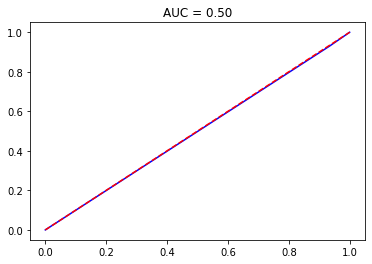

In [28]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(X_train, y_train)

y_logistic_train = logistic.predict(X_train)
y_logistic_valid = logistic.predict(X_valid)

metricas_modelos("LogisticRegression", y_valid, y_logistic_valid)

#print(f'Exactitud de Regresión en entrenamiento { precision_score(y_logistic_train, y_train) : 0.5} y validación { precision_score(y_logistic_valid, y_valid) : 0.5}')

#print(f'\nExhaustividad de Regresión en entrenamiento { recall_score(y_logistic_train, y_train) : 0.5} y validación { recall_score(y_logistic_valid, y_valid) : 0.5}')

### Árboles de decisión

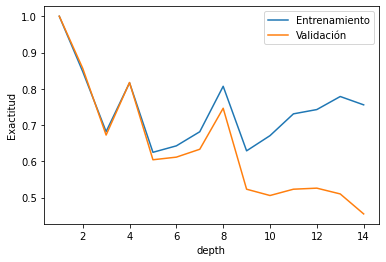

In [29]:
from sklearn.tree import DecisionTreeClassifier

depth_values = range(1, 15)
train_errors = []
val_errors = []

for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth = depth, random_state=0).fit(X_train, y_train)
    
    train_errors.append(precision_score(tree.predict(X_train), y_train))
    val_errors.append(precision_score(tree.predict(X_valid), y_valid))
    
plt.plot(depth_values, train_errors, label="Entrenamiento")
plt.plot(depth_values, val_errors, label="Validación")
plt.xlabel("depth")
plt.ylabel("Exactitud")
plt.legend(loc="best")

Modelo: DecisionTreeClassifier
	La matriz de confusión es 
[[150 445]
 [126 564]]
	Precisión: 0.5556420233463035
	Exactitud: 0.5589692765113974
	Exhaustividad: 0.8173913043478261
	F1: 0.6639199529134785
	AUC: 0.5347460723419803


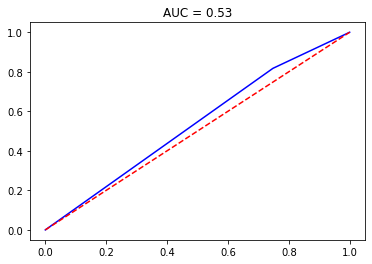

In [30]:
#from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4, random_state=0).fit(X_train, y_train)

y_tree_train = tree.predict(X_train)
y_tree_valid = tree.predict(X_valid)

metricas_modelos("DecisionTreeClassifier", y_valid, y_tree_valid)

#print(f'Exactitud de Árbol en entrenamiento { precision_score(y_tree_train, y_train) : 0.5} y validación { precision_score(y_tree_valid, y_valid) : 0.5}')

#print(f'Exhaustividad de Árbol en entrenamiento { recall_score(y_tree_train, y_train) : 0.5} y validación { recall_score(y_tree_valid, y_valid) : 0.5}')

### Random Forest

Modelo: RandomForestClassifier
	La matriz de confusión es 
[[ 39 556]
 [ 48 642]]
	Precisión: 0.5299610894941634
	Exactitud: 0.5358931552587646
	Exhaustividad: 0.9304347826086956
	F1: 0.6800847457627117
	AUC: 0.4979905005480453


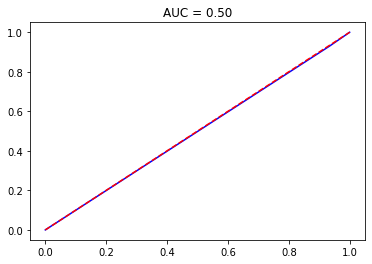

In [31]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=0).fit(X_train, y_train)

y_randomForest_train = randomForest.predict(X_train)
y_randomForest_valid = randomForest.predict(X_valid)

metricas_modelos("RandomForestClassifier", y_valid, y_logistic_valid)

### Ada Boost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.5291828793774319

## 8. Voting

In [33]:
from sklearn.svm import SVC

In [34]:
models = [
    ('logistic', LogisticRegression()),
    ('tree', DecisionTreeClassifier(max_depth=2, random_state=0)),
    ('randomForest', RandomForestClassifier(n_estimators=4, random_state=0)),
    ('svm', SVC())
]

In [35]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(models).fit(X_train, y_train)

print(f'Precisión en entrenamiento { ensemble.score(X_train, y_train) : .3f} y validación { ensemble.score(X_valid, y_valid) : .3f}')

Precisión en entrenamiento  0.648 y validación  0.539


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_scores(model, X_train, X_test, y_train, y_test):
    X_train_predict = model.predict(X_train)
    X_test_predict = model.predict(X_test)

    accuracy_train = accuracy_score(X_train_predict, y_train)
    accuracy_test = accuracy_score(X_test_predict, y_test)
    precision_train = precision_score(X_train_predict, y_train, average='weighted')
    precision_test = precision_score(X_test_predict, y_test, average='weighted')
    recall_train = recall_score(X_train_predict, y_train, average='weighted')
    recall_test = recall_score(X_test_predict, y_test, average='weighted')

    print(f'Precisión en entrenamiento { accuracy_train : .4f} y validación { accuracy_test : .4f}')
    print(f'Exactitud en entrenamiento { precision_train : .4f} y validación { precision_test : .4f}')
    print(f'Exhaustividad en entrenamiento { recall_train : .4f} y validación { recall_test : .4f}')
    
calculate_scores(ensemble, X_train, X_valid, y_train, y_valid)

Precisión en entrenamiento  0.6478 y validación  0.5393
Exactitud en entrenamiento  0.8244 y validación  0.7126
Exhaustividad en entrenamiento  0.6478 y validación  0.5393


In [37]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('kbest', SelectKBest(chi2, k=6)),
                     ('voting', VotingClassifier(models))])
pipeline.fit(X_train, y_train)

calculate_scores(pipeline, X_train, X_valid, y_train, y_valid)

Precisión en entrenamiento  0.6279 y validación  0.5377
Exactitud en entrenamiento  0.7349 y validación  0.6220
Exhaustividad en entrenamiento  0.6279 y validación  0.5377


## 10. Conjunto test

In [38]:
test_x = pd.read_csv("dataset/test_x.csv")

In [39]:
test_x

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0
2,6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0
3,6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0
4,6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0
...,...,...,...,...,...,...,...,...
721,7278,2022-03-25,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0
722,7279,2022-03-28,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0
723,7280,2022-03-29,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0
724,7281,2022-03-30,8583.299805,8597.400391,8508.900391,8550.599609,8550.599609,185389000.0


Preparamos los datos al igual que hicimos anteriormente con los datos de entrenamiento

In [40]:
test_x_ing = create_diff_columns(test_x.copy(deep=True), "Adj Close", 5)

In [41]:
test_x_ing

,test_index,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close_diff_1,Adj Close_diff_2,Adj Close_diff_3,Adj Close_diff_4
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0,NaN,NaN,NaN,NaN
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0,18.700195,NaN,NaN,NaN
2,6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0,66.899414,85.599609,NaN,NaN
3,6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0,58.000000,124.899414,143.599609,NaN
4,6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0,-12.000000,46.000000,112.899414,131.599609
...,...,...,...,...,...,...,...,...,...,...,...,...
721,7278,2022-03-25,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0,25.500000,2.199218,-156.600586,-58.600586
722,7279,2022-03-28,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0,35.000000,60.500000,37.199218,-121.600586
723,7280,2022-03-29,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0,249.000000,284.000000,309.500000,286.199218
724,7281,2022-03-30,8583.299805,8597.400391,8508.900391,8550.599609,8550.599609,185389000.0,-64.000000,185.000000,220.000000,245.500000


Tenemos dos variables prácticamente iguales, _Close_ y _Adj Close_. Eliminaremos la primera de ellas.

In [42]:
test_x_ing.drop(columns=["Close"], inplace=True)

In [43]:
test_x_ing.drop(columns=["Open"], inplace=True)

In [44]:
test_x_ing.fillna(0, inplace=True)
    
data_test_x_features = test_x_ing[features]
    
features_test_x_MinMax = scaler.transform(data_test_x_features)

In [45]:
predict_y = ensemble.predict(features_test_x_MinMax)

In [46]:
predict_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [47]:
predictions = pd.DataFrame({'test_index': test_x["test_index"], 'Target': predict_y})

In [48]:
predictions

,test_index,Target
0,6557,1
1,6558,1
2,6559,1
3,6560,1
4,6561,1
...,...,...
721,7278,1
722,7279,1
723,7280,1
724,7281,1


In [49]:
predictions.to_csv('predictions.csv', index=False)

In [50]:
predictions.to_json('predictions.json')